# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# The Dataset

In [3]:
msn02 = pd.read_csv("data/msn_02_fuel_leak_signals_preprocessed.csv", delimiter=';')

In [4]:
msn02.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623580 entries, 0 to 623579
Data columns (total 111 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    UTC_TIME                              623580 non-null  object 
 1    MSN                                   623580 non-null  object 
 2    Flight                                623580 non-null  object 
 3    ENGINE_RUNNING_1                      623580 non-null  bool   
 4    ENGINE_RUNNING_2                      623580 non-null  bool   
 5    ENGINE_RUNNING_3                      623580 non-null  bool   
 6    ENGINE_RUNNING_4                      623580 non-null  bool   
 7    FLIGHT_PHASE_COUNT                    560658 non-null  float64
 8    FUEL_FLOW_1                           514937 non-null  float64
 9    FUEL_FLOW_2                           516594 non-null  float64
 10   FUEL_FLOW_3                           516599 non-null 

In [5]:
# Setting index as datetime
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])
msn02 = msn02.set_index("UTC_TIME")

In [6]:
# Dropping Duplicates
msn02 = msn02.drop_duplicates()

In [7]:
msn02.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 610106 entries, 2011-03-09 12:06:01 to 2011-03-10 17:27:27
Data columns (total 110 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    MSN                                   610106 non-null  object 
 1    Flight                                610106 non-null  object 
 2    ENGINE_RUNNING_1                      610106 non-null  bool   
 3    ENGINE_RUNNING_2                      610106 non-null  bool   
 4    ENGINE_RUNNING_3                      610106 non-null  bool   
 5    ENGINE_RUNNING_4                      610106 non-null  bool   
 6    FLIGHT_PHASE_COUNT                    547185 non-null  float64
 7    FUEL_FLOW_1                           503789 non-null  float64
 8    FUEL_FLOW_2                           504961 non-null  float64
 9    FUEL_FLOW_3                           504966 non-null  float64
 10   FUEL_FLOW_4         

In [8]:
# Keeping only relevant columns

# Same as those available in the other MSNs except for added VALUE_FUEL_QTYCCx
columns = ['MSN', 
           'Flight',
           'FLIGHT_PHASE_COUNT','FUEL_USED_1','FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4', 
           'FW_GEO_ALTITUDE',
           'VALUE_FOB', 
           'VALUE_FUEL_QTY_CC1', 'VALUE_FUEL_QTY_CC2', 'VALUE_FUEL_QTY_CC3', 'VALUE_FUEL_QTY_CC4', 'VALUE_FUEL_QTY_CT', 
           'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4', 
           'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT'
           ]

df = msn02[columns]

In [9]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 610106 entries, 2011-03-09 12:06:01 to 2011-03-10 17:27:27
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSN                 610106 non-null  object 
 1   Flight              610106 non-null  object 
 2   FLIGHT_PHASE_COUNT  547185 non-null  float64
 3   FUEL_USED_1         503796 non-null  float64
 4   FUEL_USED_2         504967 non-null  float64
 5   FUEL_USED_3         504968 non-null  float64
 6   FUEL_USED_4         503565 non-null  float64
 7   FW_GEO_ALTITUDE     547232 non-null  float64
 8   VALUE_FOB           546849 non-null  float64
 9   VALUE_FUEL_QTY_CC1  546814 non-null  float64
 10  VALUE_FUEL_QTY_CC2  546814 non-null  float64
 11  VALUE_FUEL_QTY_CC3  546814 non-null  float64
 12  VALUE_FUEL_QTY_CC4  546814 non-null  float64
 13  VALUE_FUEL_QTY_CT   547131 non-null  float64
 14  VALUE_FUEL_QTY_FT1  547137 non-null  float64
 15  

In [10]:
df = df.dropna(subset=columns)

In [11]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503467 entries, 2011-03-09 12:06:02 to 2011-03-10 17:27:25
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSN                 503467 non-null  object 
 1   Flight              503467 non-null  object 
 2   FLIGHT_PHASE_COUNT  503467 non-null  float64
 3   FUEL_USED_1         503467 non-null  float64
 4   FUEL_USED_2         503467 non-null  float64
 5   FUEL_USED_3         503467 non-null  float64
 6   FUEL_USED_4         503467 non-null  float64
 7   FW_GEO_ALTITUDE     503467 non-null  float64
 8   VALUE_FOB           503467 non-null  float64
 9   VALUE_FUEL_QTY_CC1  503467 non-null  float64
 10  VALUE_FUEL_QTY_CC2  503467 non-null  float64
 11  VALUE_FUEL_QTY_CC3  503467 non-null  float64
 12  VALUE_FUEL_QTY_CC4  503467 non-null  float64
 13  VALUE_FUEL_QTY_CT   503467 non-null  float64
 14  VALUE_FUEL_QTY_FT1  503467 non-null  float64
 15  

# Feature Extraction

### Creating new columns

In [12]:
# Calcaulting Fuel Discrepancies
# ==============================
# Start amount of fuel on board
df['START_FOB'] = df.groupby('Flight')['VALUE_FOB'].transform('first')

# Find the total amount of fuel used
df['TOTAL_FUEL_USED'] = df['FUEL_USED_1'] + df['FUEL_USED_2'] + df['FUEL_USED_3'] + df['FUEL_USED_4']

# Find expected amount of fuel on board (Starting amount of fuel - total fuel used)
df['EXPECTED_FOB'] = df['START_FOB'] - df['TOTAL_FUEL_USED']

# Finding the discrepancy of what is on board and what is expected to be on board
df["FOB_DIFFERENCE"] = (df['EXPECTED_FOB'] - df['VALUE_FOB']).abs()

In [13]:
# Calculating fuel imbalance between left and right wings
# =======================================================

# Total Fuel in Left and Right Wing
df['TOTAL_FUEL_LW'] = (df['VALUE_FUEL_QTY_LXT'] + df['VALUE_FUEL_QTY_FT1'] + df['VALUE_FUEL_QTY_FT2'])
df['TOTAL_FUEL_RW'] = (df['VALUE_FUEL_QTY_RXT'] + df['VALUE_FUEL_QTY_FT3'] + df['VALUE_FUEL_QTY_FT4'])

# Fuel Difference
df['LW_RW_DIFF'] = (df['TOTAL_FUEL_LW'] - df['TOTAL_FUEL_RW']).abs()

# EDA

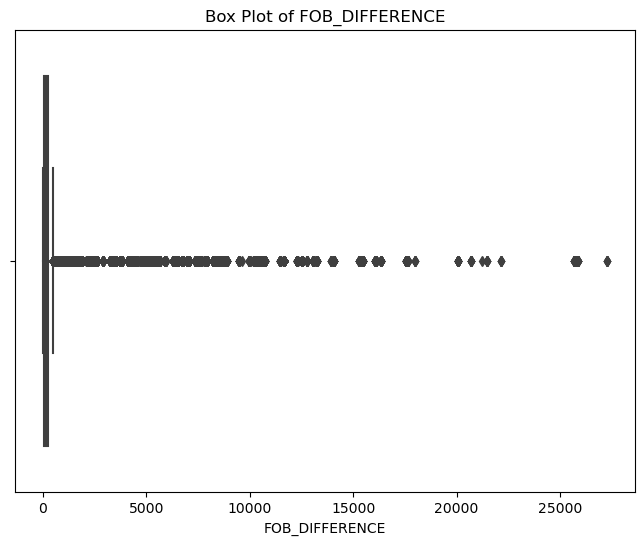

In [14]:
# Box Plot of Fuel Discrepancy
plt.figure(figsize=(8,6))
sns.boxplot(x=df['FOB_DIFFERENCE'])
plt.title('Box Plot of FOB_DIFFERENCE')
plt.show()

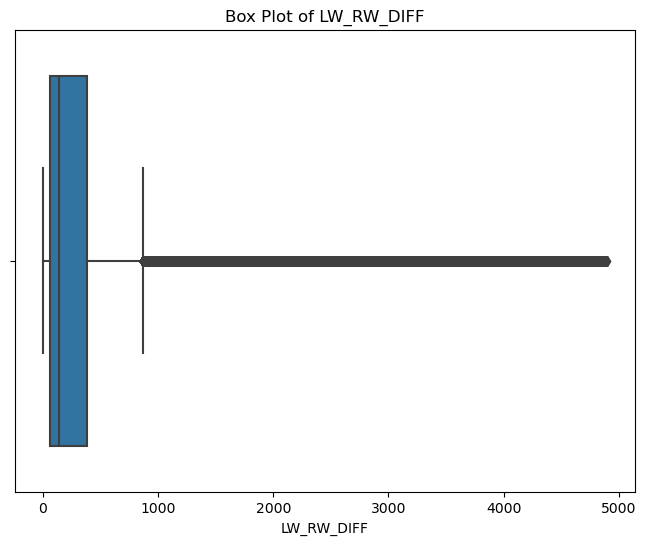

In [15]:
# Box plot of Left Wing Right Wing DIffere
plt.figure(figsize=(8,6))  
sns.boxplot(x=df['LW_RW_DIFF'])
plt.title('Box Plot of LW_RW_DIFF')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


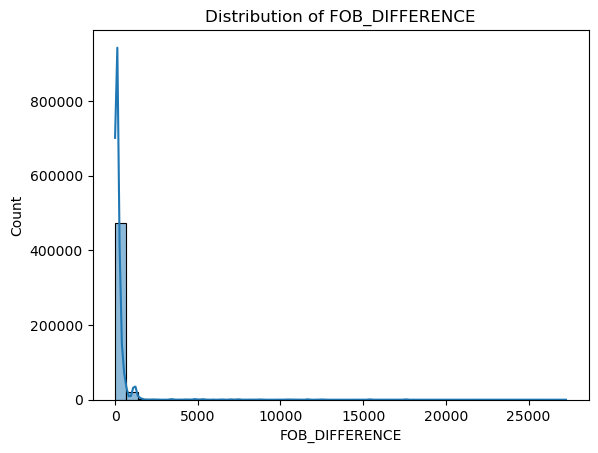

In [16]:
# Historgram of FOB Difference
sns.histplot(df["FOB_DIFFERENCE"], bins=40, kde=True)
plt.title("Distribution of FOB_DIFFERENCE")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


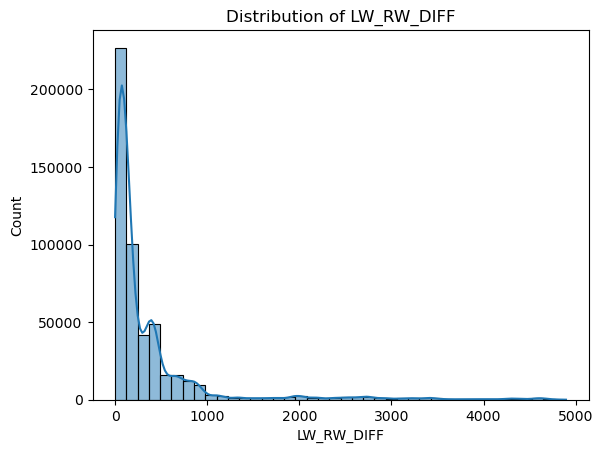

In [17]:
# Historgram of Left Wing Right Wing Difference
sns.histplot(df["LW_RW_DIFF"], bins=40, kde=True)
plt.title("Distribution of LW_RW_DIFF")
plt.show()

In [18]:
df['FOB_DIFFERENCE'].describe()

count    503467.000000
mean        293.653196
std        1056.908526
min           0.000000
25%          56.293050
50%         119.145000
75%         231.249200
max       27260.452000
Name: FOB_DIFFERENCE, dtype: float64

In [19]:
df['LW_RW_DIFF'].describe()

count    503467.000000
mean        358.159059
std         641.476543
min           0.000000
25%          64.000000
50%         140.000000
75%         385.000000
max        4895.000000
Name: LW_RW_DIFF, dtype: float64

# EDA

### Fuel Discrepancy vs Left Wing Right Wing Difference

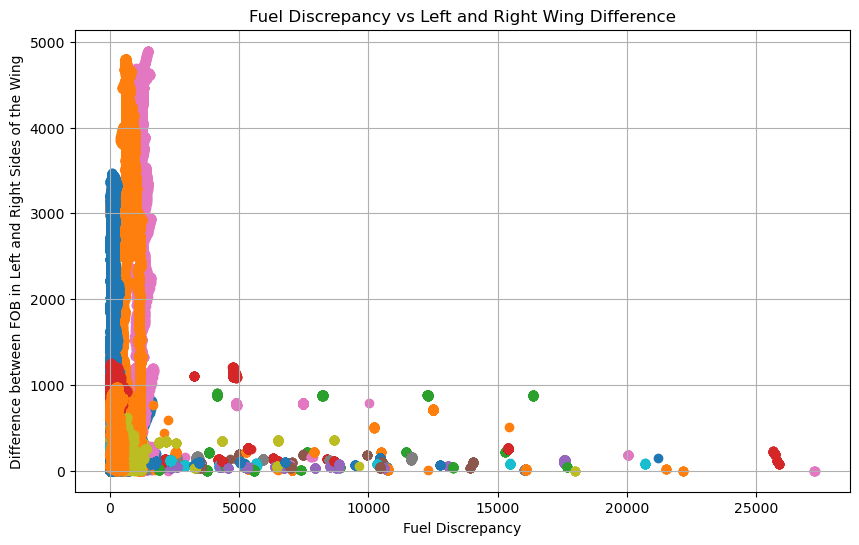

In [23]:
# With all flights
# ================
# Create a scatter plot
plt.figure(figsize=(10, 6))
for flight in df['Flight'].unique():
    flight_data = df[df['Flight'] == flight]
    plt.scatter(flight_data['FOB_DIFFERENCE'], flight_data['LW_RW_DIFF'], label=f'Flight {flight}')

# Set the title and axis labels
plt.title("Fuel Discrepancy vs Left and Right Wing Difference")
plt.xlabel("Fuel Discrepancy")
plt.ylabel("Difference between FOB in Left and Right Sides of the Wing")

# Show the plot
plt.grid(True)
plt.show()


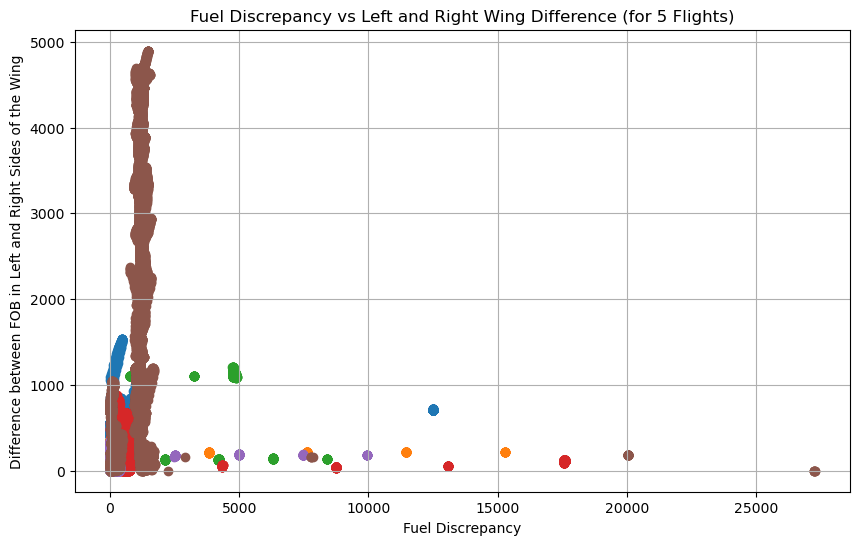

In [ ]:
# With some flights
# =================

flights_to_plot = df['Flight'].unique()[:7]

# Create a scatter plot
plt.figure(figsize=(10, 6))
for flight in flights_to_plot[1:]:
    flight_data = df[df['Flight'] == flight]
    plt.scatter(flight_data['FOB_DIFFERENCE'], flight_data['LW_RW_DIFF'], label=f'Flight {flight}')

# Set the title and axis labels
plt.title("Fuel Discrepancy vs Left and Right Wing Difference (for 5 Flights)")
plt.xlabel("Fuel Discrepancy")
plt.ylabel("Difference between FOB in Left and Right Sides of the Wing")

# Show the plot
plt.grid(True)
plt.show()

### Fuel Discrepancy vs Altitude Difference

In [25]:
df['ALTITUDE_DIFF'] = df.groupby('Flight')['FW_GEO_ALTITUDE'].transform('diff')

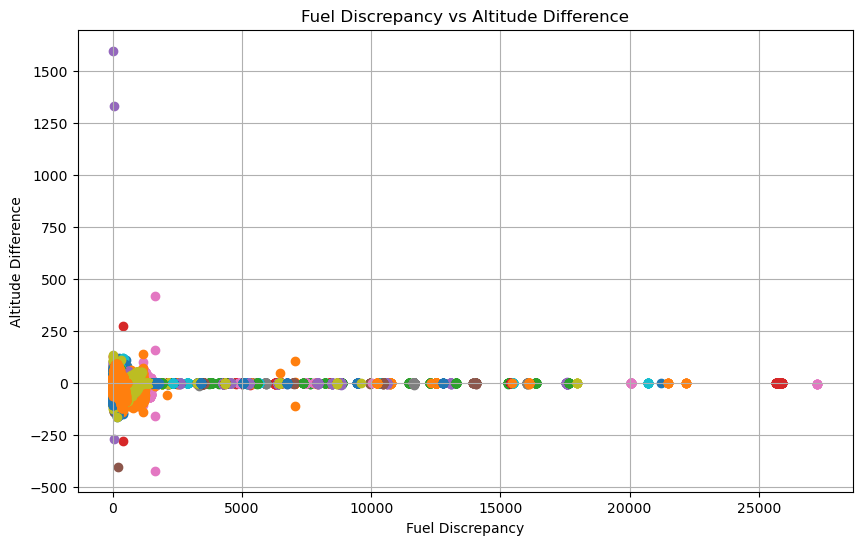

In [26]:
# With all flights
# ================

# Create a figure for the scatter plot
plt.figure(figsize=(10, 6))

# Iterate through each flight and plot the scatter plot
for flight in df['Flight'].unique():
    flight_data = df[df['Flight'] == flight]
    
    # Scatter plot for each flight, with color differentiation based on the 'Flight'
    plt.scatter(flight_data['FOB_DIFFERENCE'], flight_data['ALTITUDE_DIFF'], label=f'Flight {flight}')

# Set the title and axis labels
plt.title("Fuel Discrepancy vs Altitude Difference")
plt.xlabel("Fuel Discrepancy")
plt.ylabel("Altitude Difference")

# Show the plot with a grid
plt.grid(True)
plt.show()

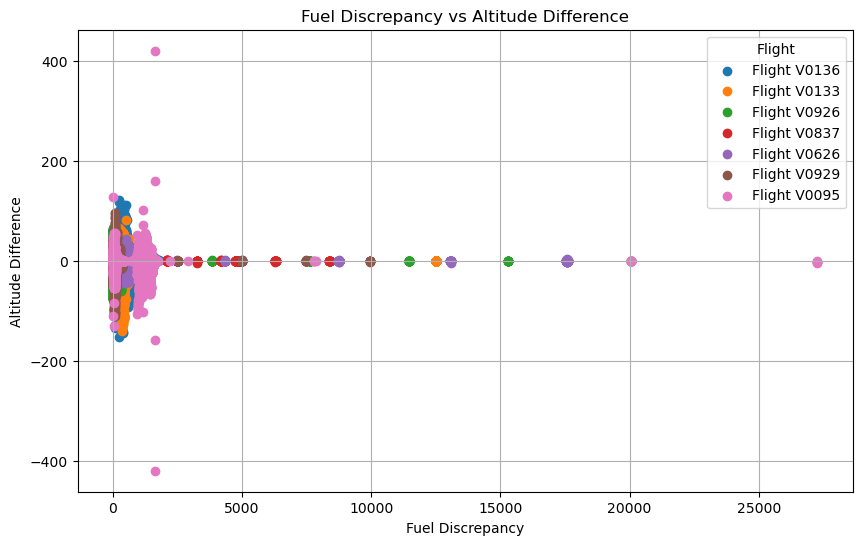

In [27]:
# With Certain Flights
# ====================
# Create a figure for the scatter plot
plt.figure(figsize=(10, 6))

# Iterate through each flight and plot the scatter plot
for flight in flights_to_plot:
    flight_data = df[df['Flight'] == flight]
    
    # Scatter plot for each flight, with color differentiation based on the 'Flight'
    plt.scatter(flight_data['FOB_DIFFERENCE'], flight_data['ALTITUDE_DIFF'], label=f'Flight {flight}')

# Set the title and axis labels
plt.title("Fuel Discrepancy vs Altitude Difference")
plt.xlabel("Fuel Discrepancy")
plt.ylabel("Altitude Difference")

# Add a legend for flight differentiation
plt.legend(title="Flight")

# Show the plot with a grid
plt.grid(True)
plt.show()

### Left Wing Right Wing Difference vs Altitude Difference

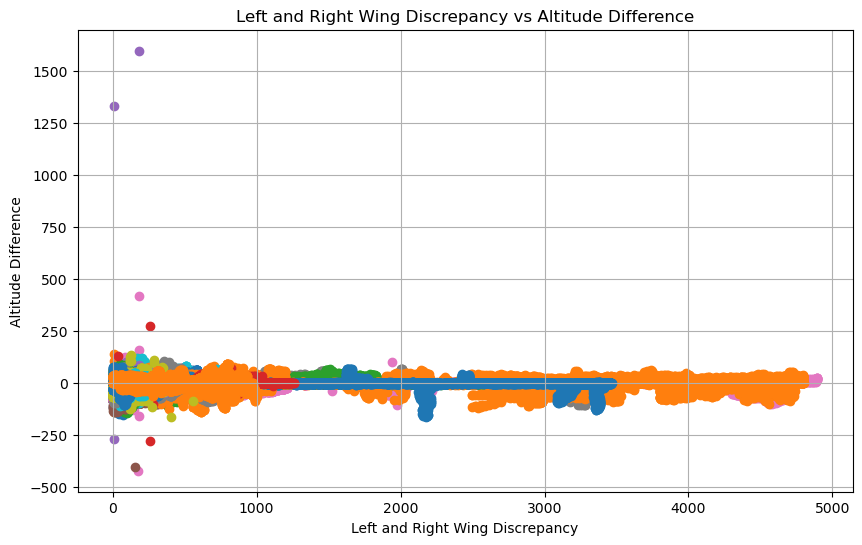

In [ ]:
# With all flights
# ================

# Create a figure for the scatter plot
plt.figure(figsize=(10, 6))

# Iterate through each flight and plot the scatter plot
for flight in df['Flight'].unique():
    flight_data = df[df['Flight'] == flight]
    
    # Scatter plot for each flight, with color differentiation based on the 'Flight'
    plt.scatter(flight_data['LW_RW_DIFF'], flight_data['ALTITUDE_DIFF'], label=f'Flight {flight}')

# Set the title and axis labels
plt.title("Left and Right Wing Discrepancy vs Altitude Difference")
plt.xlabel("Left and Right Wing Discrepancy")
plt.ylabel("Altitude Difference")

# Show the plot with a grid
plt.grid(True)
plt.show()

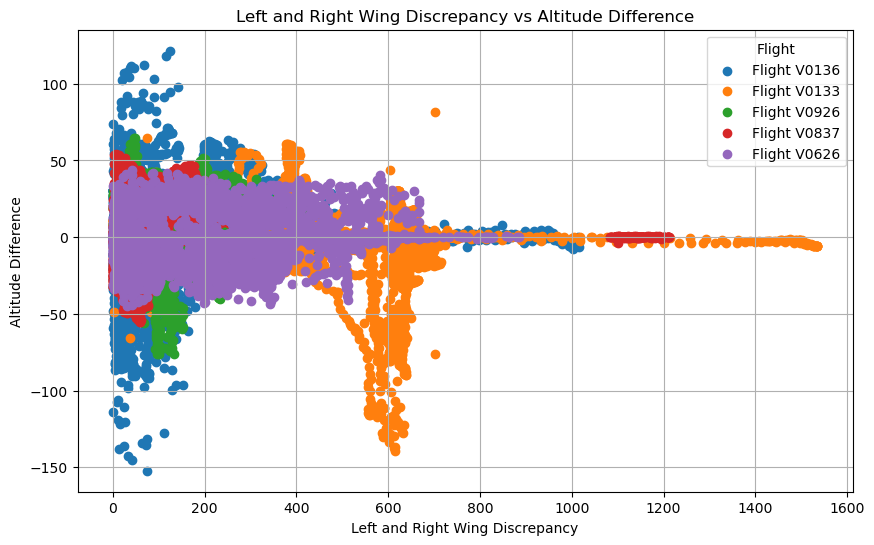

In [29]:
# With certain flights
# ====================

# Create a figure for the scatter plot
plt.figure(figsize=(10, 6))

# Limit the loop to only the first 5 flights
for flight in df['Flight'].unique()[:5]:  # Limit to the first 5 flights
    flight_data = df[df['Flight'] == flight]
    
    # Scatter plot for each flight, with color differentiation based on the 'Flight'
    plt.scatter(flight_data['LW_RW_DIFF'], flight_data['ALTITUDE_DIFF'], label=f'Flight {flight}')

# Set the title and axis labels
plt.title("Left and Right Wing Discrepancy vs Altitude Difference")
plt.xlabel("Left and Right Wing Discrepancy")
plt.ylabel("Altitude Difference")

# Add a legend for flight differentiation
plt.legend(title="Flight")

# Show the plot with a grid
plt.grid(True)
plt.show()


### Value of Fuel on Board vs Expected Fuel on Board

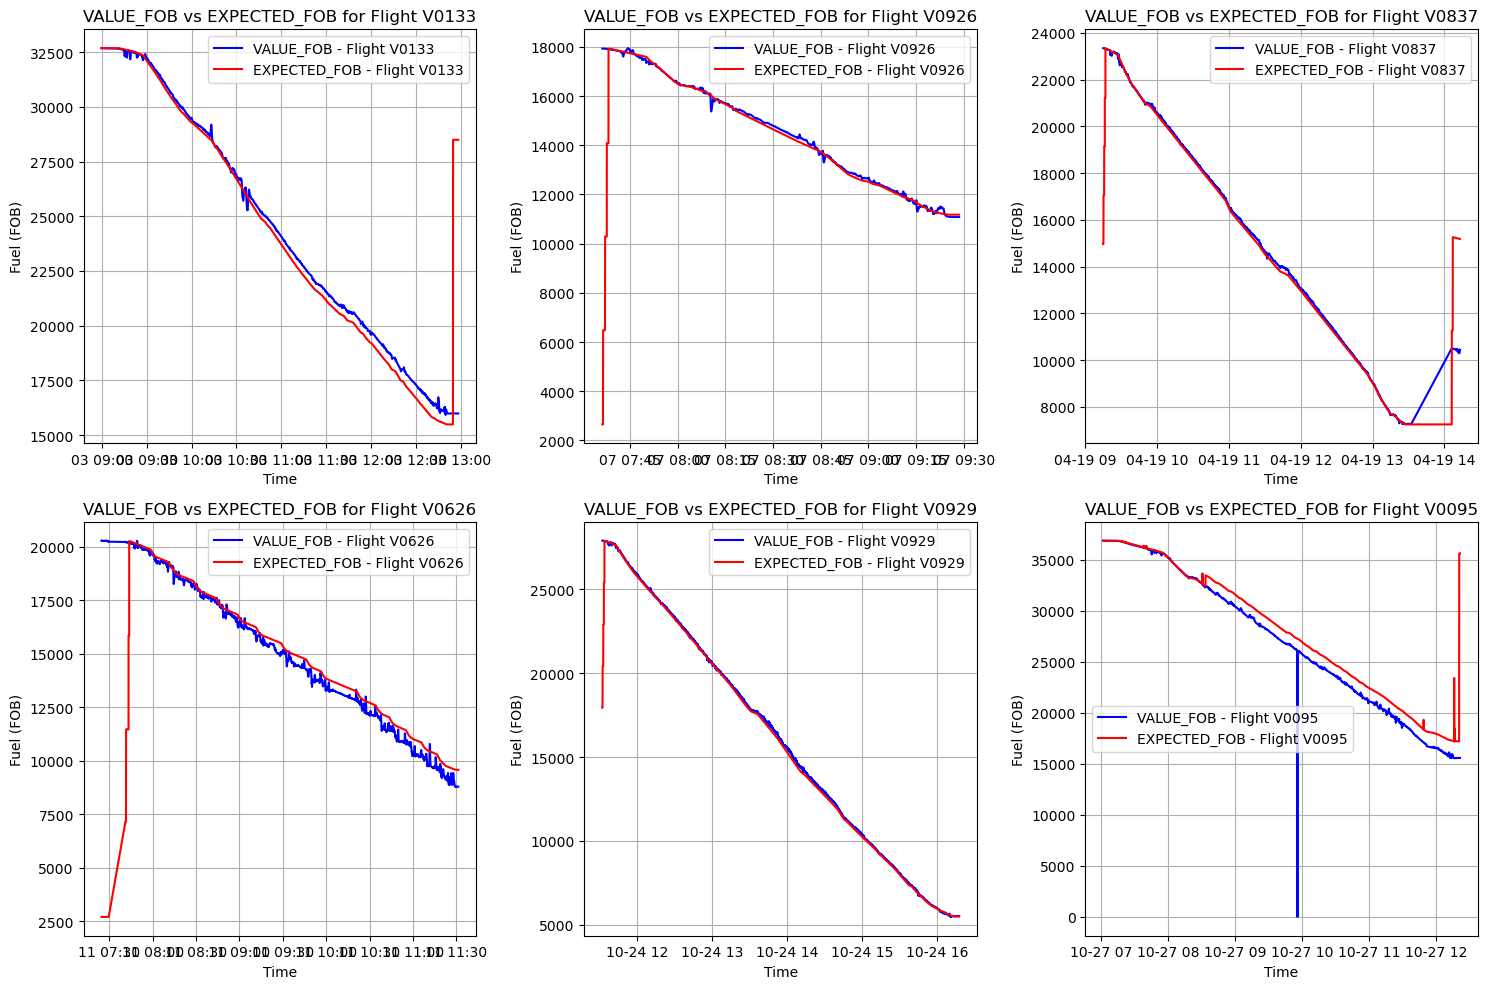

In [33]:
# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2  # you can change this based on the number of flights
cols = 3  # you can change this based on the number of flights

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # skipping the first flight
    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the actual fuel on board (VALUE_FOB) vs expected fuel on board (EXPECTED_FOB)
    ax.plot(flight_data.index, flight_data['VALUE_FOB'], label=f'VALUE_FOB - Flight {flight}', color='blue')
    ax.plot(flight_data.index, flight_data['EXPECTED_FOB'], label=f'EXPECTED_FOB - Flight {flight}', color='red')
    
    # Set the title and labels for the subplot
    ax.set_title(f'VALUE_FOB vs EXPECTED_FOB for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

### Comparing Starting FOB with TOTAL_FUEL_USED and the remaining fuel on board (VALUE_FOB)

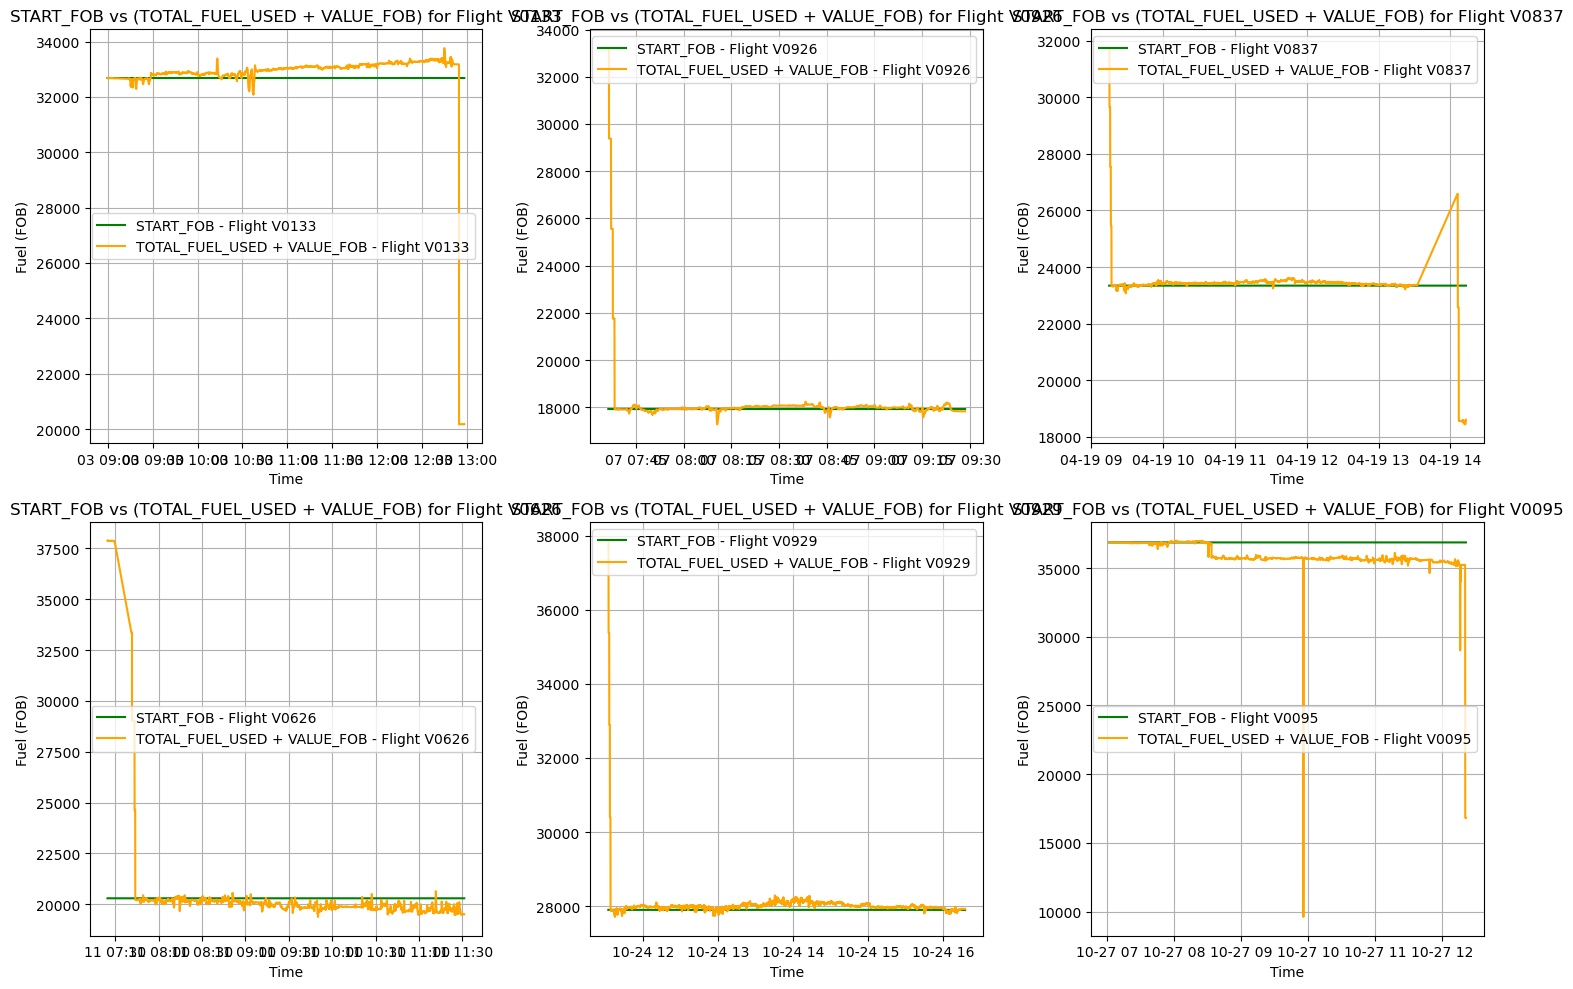

In [ ]:
# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2 
cols = 3  

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the START_FOB
    ax.plot(flight_data.index, flight_data['START_FOB'], label=f'START_FOB - Flight {flight}', color='green')
    
    # Calculate TOTAL_FUEL_USED + VALUE_FOB for the entire flight
    total_fuel_used_plus_fob = flight_data['TOTAL_FUEL_USED'] + flight_data['VALUE_FOB']
    
    # Plot the TOTAL_FUEL_USED + VALUE_FOB
    ax.plot(flight_data.index, total_fuel_used_plus_fob, label=f'TOTAL_FUEL_USED + VALUE_FOB - Flight {flight}', color='orange')
    
    # Set the title and labels for the subplot
    ax.set_title(f'START_FOB vs (TOTAL_FUEL_USED + VALUE_FOB) for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

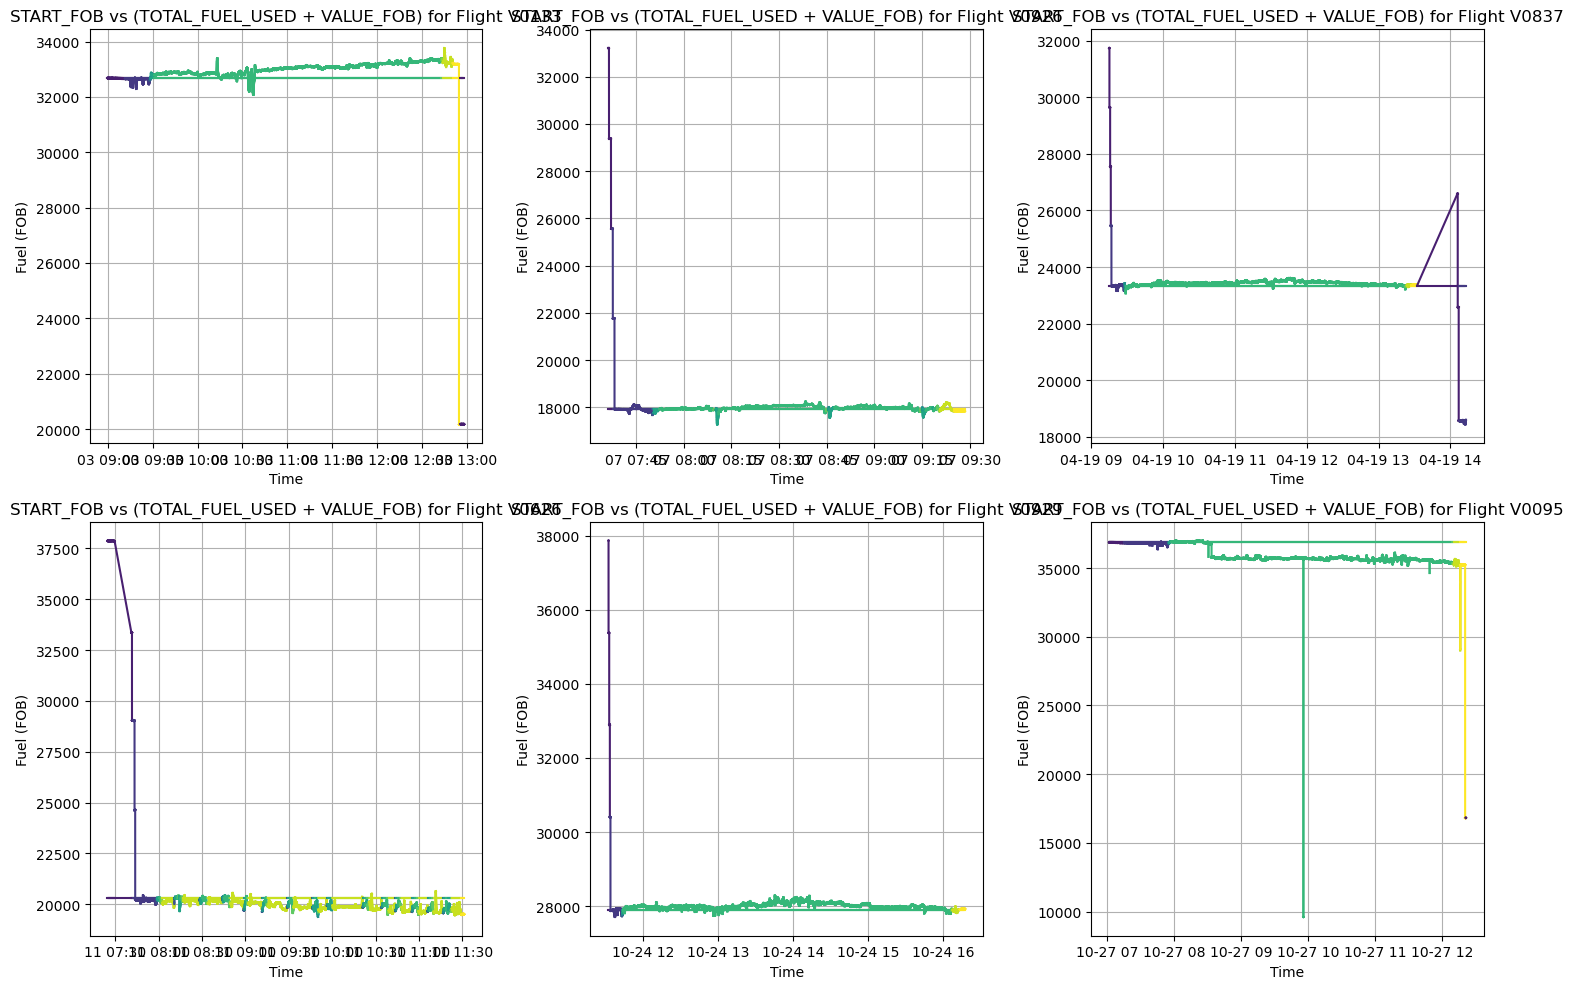

In [39]:
# Initialize counter
counter = 0

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Loop over rows and plot segments for both 'START_FOB' and 'TOTAL_FUEL_USED + VALUE_FOB'
    for i in range(1, len(flight_data)):
        # Color by FLIGHT_PHASE_COUNT using a colormap
        color = plt.cm.viridis(flight_data['FLIGHT_PHASE_COUNT'].iloc[i] / flight_data['FLIGHT_PHASE_COUNT'].max())
        
        # Plot a line segment for START_FOB
        ax.plot(flight_data.index[i-1:i+1], flight_data['START_FOB'].iloc[i-1:i+1], color=color)
        
        # Plot a line segment for TOTAL_FUEL_USED + VALUE_FOB
        ax.plot(flight_data.index[i-1:i+1], (flight_data['TOTAL_FUEL_USED'] + flight_data['VALUE_FOB']).iloc[i-1:i+1], color=color)
    
    # Set the title and labels for the subplot
    ax.set_title(f'START_FOB vs (TOTAL_FUEL_USED + VALUE_FOB) for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

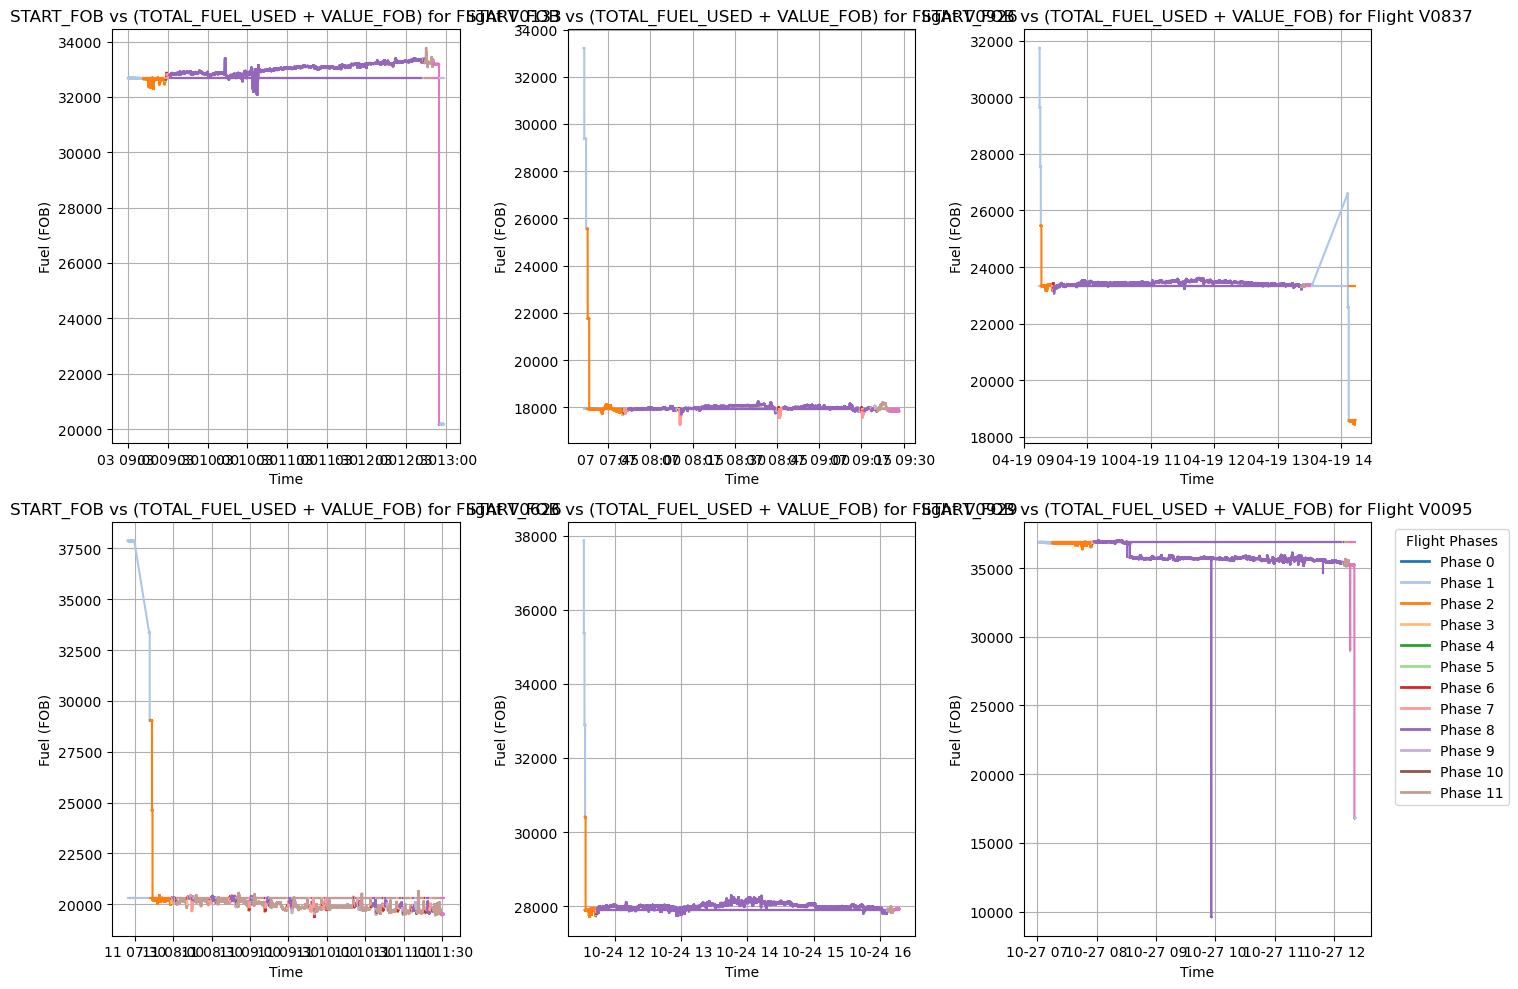

In [43]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Initialize counter
counter = 0

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# List of colors for each flight phase (0 to 11) using tab20 colormap
phase_colors = plt.cm.tab20.colors  # Using a 20-color colormap from matplotlib

# Create a list to store legend handles and labels
legend_handles = []
legend_labels = []

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Loop over rows and plot segments for both 'START_FOB' and 'TOTAL_FUEL_USED + VALUE_FOB'
    for i in range(1, len(flight_data)):
        # Get the phase count for the current row
        phase = flight_data['FLIGHT_PHASE_COUNT'].iloc[i]
        
        # Ensure phase is an integer
        phase = int(phase)  # Convert phase to an integer
        
        # Assign a color based on the phase count (0-11)
        color = phase_colors[phase]
        
        # Plot a line segment for START_FOB
        ax.plot(flight_data.index[i-1:i+1], flight_data['START_FOB'].iloc[i-1:i+1], color=color)
        
        # Plot a line segment for TOTAL_FUEL_USED + VALUE_FOB
        ax.plot(flight_data.index[i-1:i+1], (flight_data['TOTAL_FUEL_USED'] + flight_data['VALUE_FOB']).iloc[i-1:i+1], color=color)
    
    # Set the title and labels for the subplot
    ax.set_title(f'START_FOB vs (TOTAL_FUEL_USED + VALUE_FOB) for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Add the legend outside the plots
# Add legend for color phases
for i, phase in enumerate(range(12)):
    legend_handles.append(plt.Line2D([0], [0], color=phase_colors[i], lw=2))
    legend_labels.append(f'Phase {phase}')

# Create a legend for flight phases
plt.legend(handles=legend_handles, labels=legend_labels, title="Flight Phases", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### Comparing Left Wing Right Wing Different with Flight Phase

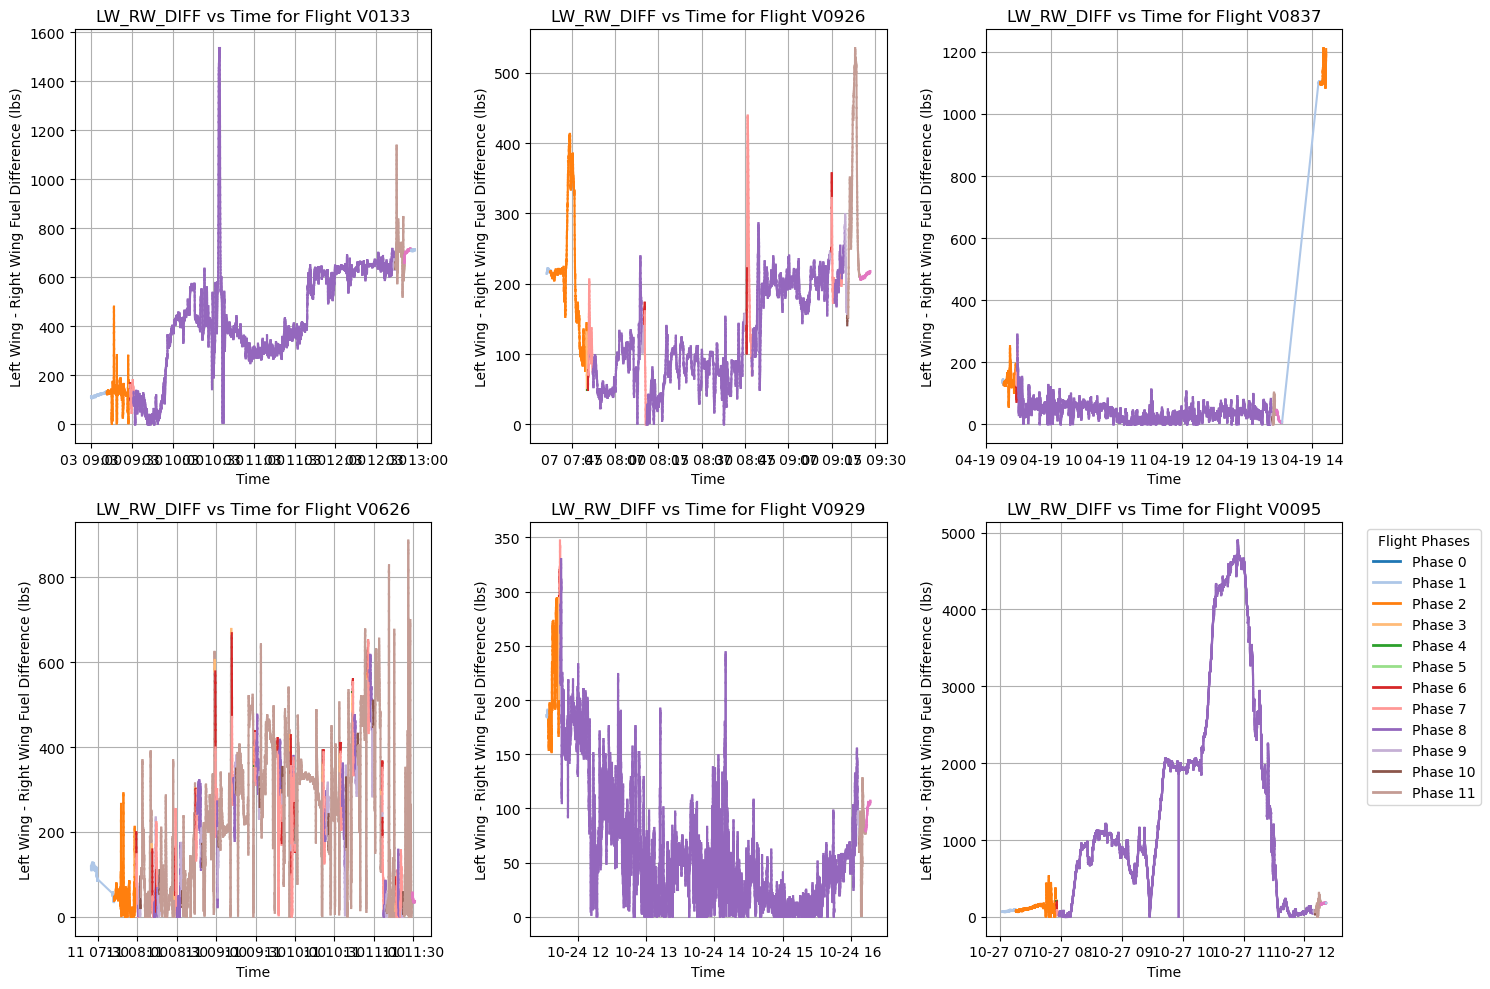

In [44]:
# Initialize counter
counter = 0

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# List of colors for each flight phase (0 to 11) using tab20 colormap
phase_colors = plt.cm.tab20.colors  # Using a 20-color colormap from matplotlib

# Create a list to store legend handles and labels
legend_handles = []
legend_labels = []

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Loop over rows and plot segments for 'LW_RW_DIFF' with color based on 'FLIGHT_PHASE_COUNT'
    for i in range(1, len(flight_data)):
        # Get the phase count for the current row
        phase = flight_data['FLIGHT_PHASE_COUNT'].iloc[i]
        
        # Ensure phase is an integer
        phase = int(phase)  # Convert phase to an integer
        
        # Assign a color based on the phase count (0-11)
        color = phase_colors[phase]
        
        # Plot a line segment for LW_RW_DIFF
        ax.plot(flight_data.index[i-1:i+1], flight_data['LW_RW_DIFF'].iloc[i-1:i+1], color=color)
    
    # Set the title and labels for the subplot
    ax.set_title(f'LW_RW_DIFF vs Time for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Left Wing - Right Wing Fuel Difference (lbs)')
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Add the legend outside the plots
# Add legend for color phases
for i, phase in enumerate(range(12)):
    legend_handles.append(plt.Line2D([0], [0], color=phase_colors[i], lw=2))
    legend_labels.append(f'Phase {phase}')

# Create a legend for flight phases
plt.legend(handles=legend_handles, labels=legend_labels, title="Flight Phases", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


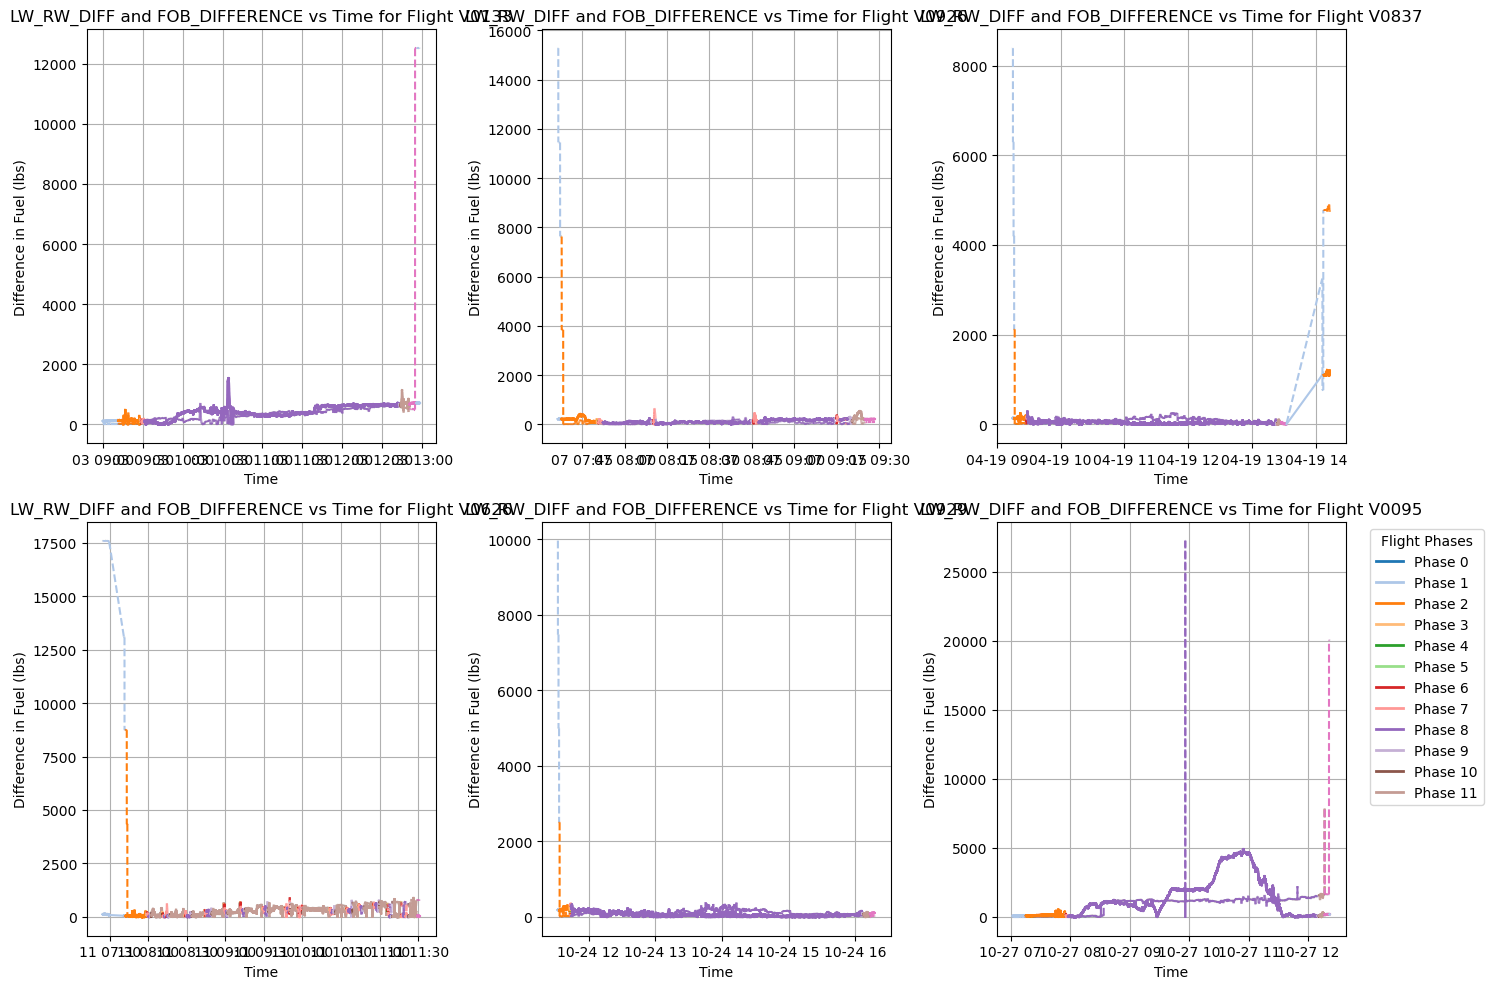

In [46]:
# Initialize counter
counter = 0

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# List of colors for each flight phase (0 to 11) using tab20 colormap
phase_colors = plt.cm.tab20.colors  # Using a 20-color colormap from matplotlib

# Create a list to store legend handles and labels
legend_handles = []
legend_labels = []

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Loop over rows and plot segments for 'LW_RW_DIFF' and 'FUEL_DIFFERENCE' with color based on 'FLIGHT_PHASE_COUNT'
    for i in range(1, len(flight_data)):
        # Get the phase count for the current row
        phase = flight_data['FLIGHT_PHASE_COUNT'].iloc[i]
        
        # Ensure phase is an integer
        phase = int(phase)  # Convert phase to an integer
        
        # Assign a color based on the phase count (0-11)
        color = phase_colors[phase]
        
        # Plot a line segment for LW_RW_DIFF
        ax.plot(flight_data.index[i-1:i+1], flight_data['LW_RW_DIFF'].iloc[i-1:i+1], color=color, label=f'Flight {flight} - LW_RW_DIFF' if i == 1 else "")
        
        # Plot a line segment for FUEL_DIFFERENCE
        ax.plot(flight_data.index[i-1:i+1], flight_data['FOB_DIFFERENCE'].iloc[i-1:i+1], color=color, linestyle='dashed', label=f'Flight {flight} - FOB_DIFFERENCE' if i == 1 else "")
    
    # Set the title and labels for the subplot
    ax.set_title(f'LW_RW_DIFF and FOB_DIFFERENCE vs Time for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Difference in Fuel (lbs)')
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Add the legend outside the plots
# Add legend for color phases
for i, phase in enumerate(range(12)):
    legend_handles.append(plt.Line2D([0], [0], color=phase_colors[i], lw=2))
    legend_labels.append(f'Phase {phase}')

# Create a legend for flight phases
plt.legend(handles=legend_handles, labels=legend_labels, title="Flight Phases", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
